<a href="https://colab.research.google.com/github/riotrip/ml-smt5/blob/main/TG1_JS06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rio Tri Prayogo - 2341720236 - TI 3F/25**
---
## **JS06 - Hierarchical Clustering**

### **Tugas Praktikum 1**

* Gunakan dataset CC_Customer_Dataset.csv dari Tugas Pratikum
* Buatlah model klasterisasi dengan menggunakan Agglomerative Clustering dengan seluruh variabel yang dapat digunakan.
* Buatlah scatterplot berdasarkan dataset menggunakan dua variabel, yaitu Avg_Credit_Limit dan Total_credit_card. Tunjukkan bentuk cluster-nya berdasarkan dua fitur tersebut.
* Tentukan nilai silhouette score dan DBI dari model.

Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. Load dataset

In [2]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/PembelajaranMesin_Rio/docs/CC_Customer_Dataset.csv')

# Inspect info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


2. Buatlah model klasterisasi dengan menggunakan Agglomerative Clustering dengan seluruh variabel yang dapat digunakan.

Ambil seluruh variabel yang dapat digunakan (numerik)

In [3]:
X = df.iloc[:, 2:].values

Visualisasi Dendogram

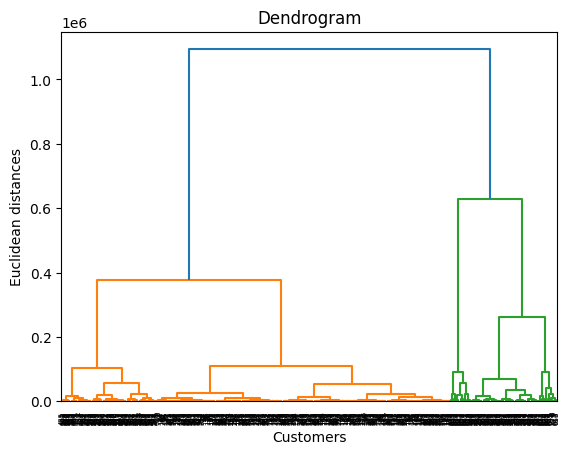

In [4]:
# Build dendogram
import scipy.cluster.hierarchy as sch

# Build dendogram using ward distance
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# Plot
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Membuat Model Agglomerative

In [5]:
# Build Cluster using Agglomerative Method
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

Visualisasi Cluster seluruh variabel yang dapat digunakan

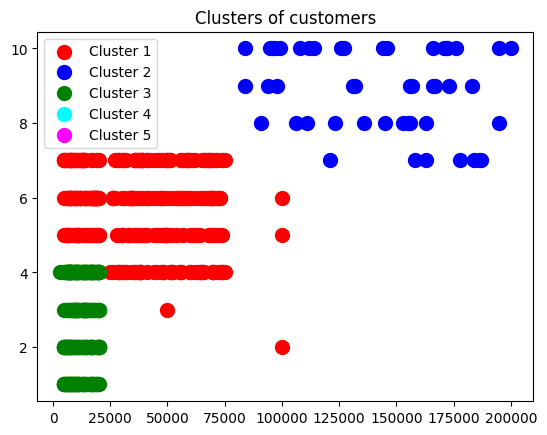

In [13]:
# Visualize The Result
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.legend()
plt.show()

3. Buatlah scatterplot berdasarkan dataset menggunakan dua variabel, yaitu Avg_Credit_Limit dan Total_credit_card. Tunjukkan bentuk cluster-nya berdasarkan dua fitur tersebut.

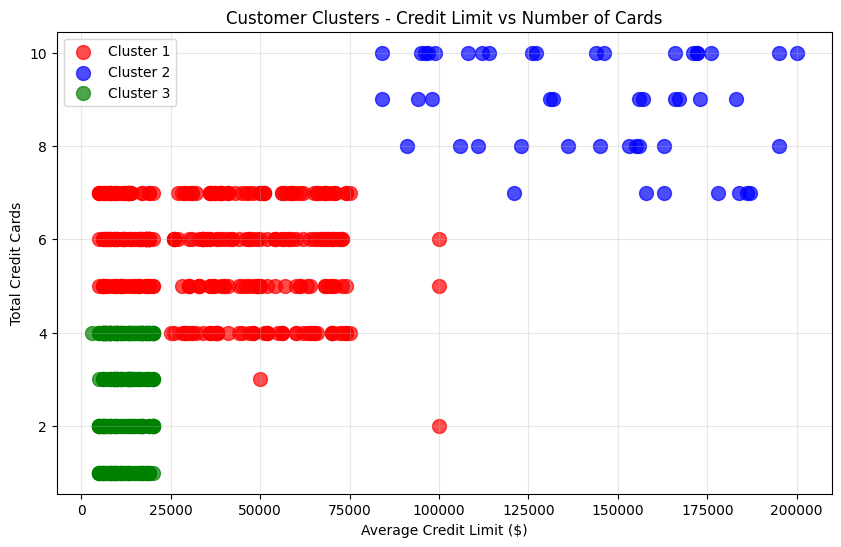

In [12]:
from sklearn.preprocessing import StandardScaler

# Slicing:  Avg_Credit_Limit dan Total_credit_card
X_2var = df[['Avg_Credit_Limit', 'Total_Credit_Cards']].values

# Standardisasi (opsional, tapi recommended untuk Agglomerative Clustering)
scaler_2var = StandardScaler()
X_scaled_2var = scaler_2var.fit_transform(X_2var)

# Agglomerative Clustering
agg_cluster_2var = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc_2var = agg_cluster_2var.fit_predict(X_scaled_2var)

# Visualize The Result
plt.figure(figsize=(10, 6))
plt.scatter(X_2var[y_hc_2var == 0, 0], X_2var[y_hc_2var == 0, 1], s = 100, c = 'red', label = 'Cluster 1', alpha=0.7)
plt.scatter(X_2var[y_hc_2var == 1, 0], X_2var[y_hc_2var == 1, 1], s = 100, c = 'blue', label = 'Cluster 2', alpha=0.7)
plt.scatter(X_2var[y_hc_2var == 2, 0], X_2var[y_hc_2var == 2, 1], s = 100, c = 'green', label = 'Cluster 3', alpha=0.7)

plt.title('Customer Clusters - Credit Limit vs Number of Cards')
plt.xlabel('Average Credit Limit ($)')
plt.ylabel('Total Credit Cards')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

4. Tentukan nilai silhouette score dan DBI dari model.

In [14]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# Silhouette coefficient: Seluruh variabel yang dapat digunakan
silhouette_avg = silhouette_score(X, y_hc)
print(f'Silhouette Coefficient all variabel: {silhouette_avg}')
# DBI Score: Seluruh variabel yang dapat digunakan
dbi = davies_bouldin_score(X, y_hc)
print(f'DBI Score all variabel: {dbi}')

# Silhouette coefficient: 2 variabel Avg_Credit_Limit dan Total_credit_card
silhouette_avg_2var = silhouette_score(X_2var, y_hc_2var)
print(f'Silhouette Coefficient Avg_Credit_Limit dan Total_credit_card: {silhouette_avg_2var}')
# DBI Score: 2 variabel Avg_Credit_Limit dan Total_credit_card
dbi_2var = davies_bouldin_score(X_2var, y_hc_2var)
print(f'DBI Score Avg_Credit_Limit dan Total_credit_card: {dbi_2var}')

Silhouette Coefficient all variabel: 0.3166493191379939
DBI Score all variabel: 0.7699960504184582
Silhouette Coefficient Avg_Credit_Limit dan Total_credit_card: 0.3166493191379939
DBI Score Avg_Credit_Limit dan Total_credit_card: 0.7699960504184582


**Tugas Praktikum 2**
1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).
2. Lakukan clustering dengan HDBSCAN.
3. Laporkan hasil:
* Jumlah cluster yang terbentuk.
* Banyaknya noise.
* Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu, dikarenakan visualisasi hanya dapat dilakukan hingga 3 dimensi).
4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

Import Library

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import hdbscan

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).

In [16]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/PembelajaranMesin_Rio/docs/Iris.csv')

# Inspect info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


2. Lakukan clustering dengan HDBSCAN.

In [17]:
# Pisahkan fitur dan label
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering dengan HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=3)
cluster_labels = clusterer.fit_predict(X_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


3. Laporkan hasil:
* Jumlah cluster yang terbentuk.
* Banyaknya noise.
* Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu, dikarenakan visualisasi hanya dapat dilakukan hingga 3 dimensi).

In [19]:
# Jumlah cluster dan noise
print("=== HASIL CLUSTERING HDBSCAN ===")
n_clusters = clusterer.labels_.max() + 1
n_noise = np.sum(clusterer.labels_ == -1)
total_samples = len(clusterer.labels_)

print(f"Jumlah cluster yang terbentuk: {n_clusters}")
print(f"Banyaknya noise: {n_noise}")
print(f"Total sampel: {total_samples}")
print(f"Persentase noise: {n_noise / total_samples * 100:.2f}%")

print("\n=== DISTRIBUSI CLUSTER ===")
unique, counts = np.unique(cluster_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    if cluster == -1:
        print(f"Noise: {count} sampel")
    else:
        print(f"Cluster {cluster}: {count} sampel")

=== HASIL CLUSTERING HDBSCAN ===
Jumlah cluster yang terbentuk: 2
Banyaknya noise: 2
Total sampel: 150
Persentase noise: 1.33%

=== DISTRIBUSI CLUSTER ===
Noise: 2 sampel
Cluster 0: 99 sampel
Cluster 1: 49 sampel


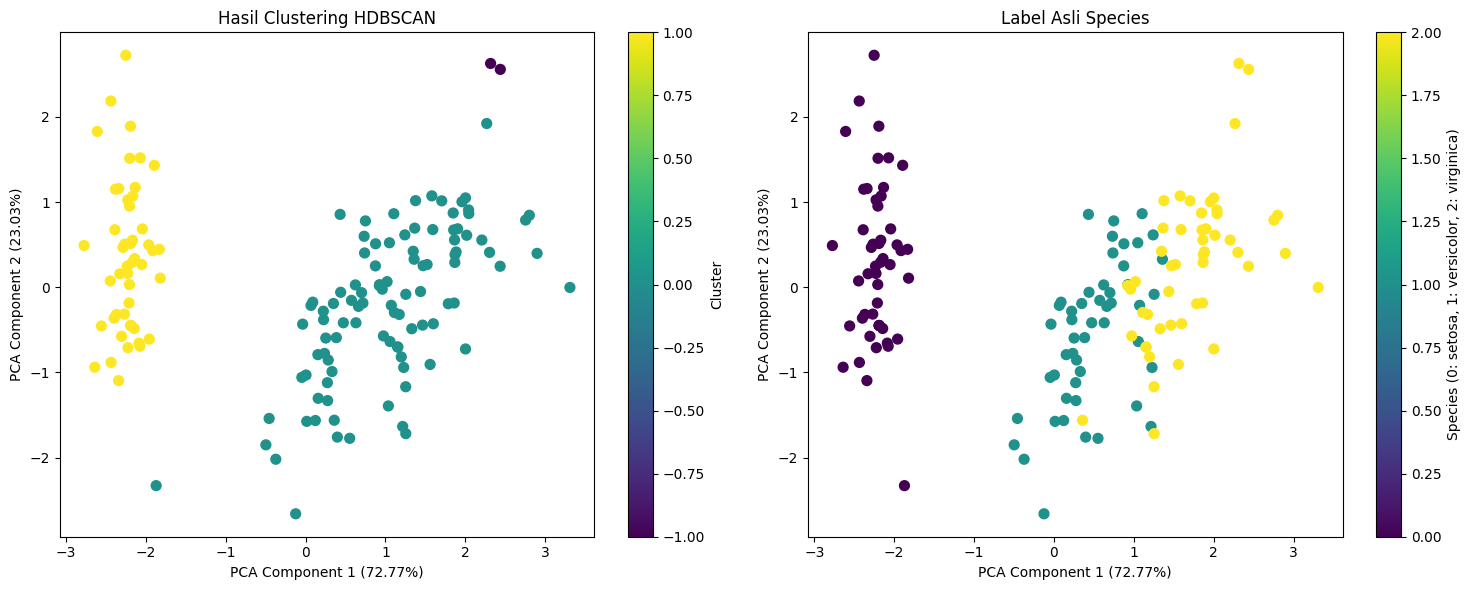

In [20]:
from sklearn.decomposition import PCA
# Visualisasi dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Buat DataFrame untuk visualisasi
results_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Cluster': cluster_labels,
    'Species': y
})

# Plot hasil clustering
plt.figure(figsize=(15, 6))

# Plot 1: Hasil Clustering HDBSCAN
plt.subplot(1, 2, 1)
scatter = plt.scatter(results_df['PCA1'], results_df['PCA2'],
                     c=results_df['Cluster'], cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster')
plt.title('Hasil Clustering HDBSCAN')
plt.xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1]:.2%})')

# Plot 2: Label Asli Species
plt.subplot(1, 2, 2)
species_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
species_numeric = [species_map[s] for s in results_df['Species']]
scatter = plt.scatter(results_df['PCA1'], results_df['PCA2'],
                     c=species_numeric, cmap='viridis', s=50)
plt.colorbar(scatter, label='Species (0: setosa, 1: versicolor, 2: virginica)')
plt.title('Label Asli Species')
plt.xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1]:.2%})')

plt.tight_layout()
plt.show()

4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

Hasil clustering HDBSCAN membentuk 2 cluster dengan hanya 2 noise (1.33%). Cluster 1 berisi 49 sampel Iris-setosa secara sempurna, sementara Cluster 0 menggabungkan 99 sampel Iris-versicolor dan Iris-virginica. Hal ini menunjukkan HDBSCAN berhasil memisahkan Iris-setosa namun tidak dapat membedakan versicolor dan virginica akibat overlap karakteristik yang signifikan antara kedua species tersebut.